In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [2]:
df_da = df[df["job_title_short"] == "Data Analyst"].copy()
df_da["job_posted_month_no"] = df_da['job_posted_date'].dt.month
df_da_explode =df_da.explode("job_skills")

In [3]:
df_da_pivot = df_da_explode.pivot_table(index ="job_posted_month_no",columns= "job_skills",aggfunc="size",fill_value= 0)
df_da_pivot.loc["Total"] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc["Total"].sort_values(ascending= False).index]

df_da_pivot = df_da_pivot.drop("Total")

In [4]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot["job_posted_month"] = df_da_pivot["job_posted_month_no"].apply(lambda x: pd.to_datetime(x,format="%m").strftime("%b"))
df_da_pivot = df_da_pivot.drop(columns="job_posted_month_no")
df_da_pivot = df_da_pivot.set_index("job_posted_month")

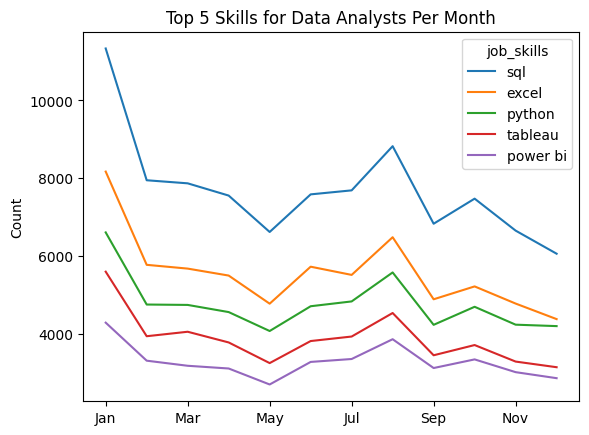

In [5]:
df_da_pivot.iloc[:,:5].plot(kind = "line")

plt.title("Top 5 Skills for Data Analysts Per Month")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [6]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


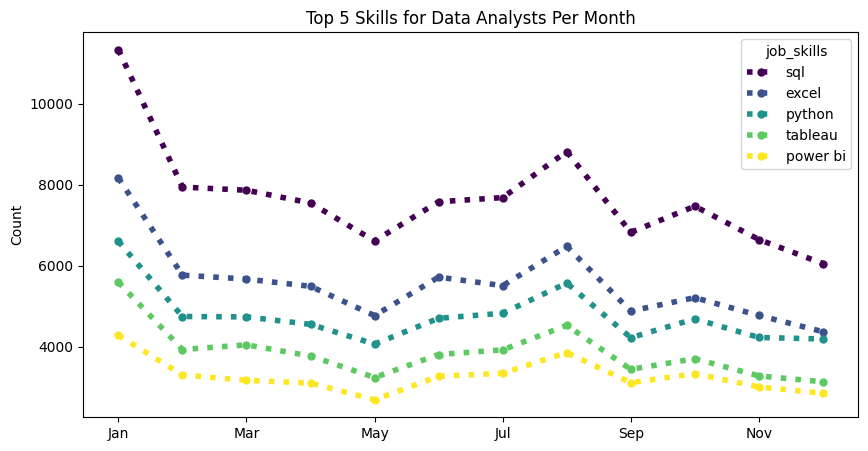

In [12]:
df_da_pivot.iloc[:,:5].plot(
    kind ="line",
    linewidth = 4,
    linestyle =":",
    colormap= "viridis",
    markersize = 5,
    marker="o",
    figsize = (10,5)
)
plt.title("Top 5 Skills for Data Analysts Per Month")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [21]:
df =df[df["job_title_short"] == "Data Analyst"]
df_exploded = df.explode("job_skills")
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count  = ("job_skills","count"),
    median_salary = ("salary_year_avg","median")
)
skill_count = 20
skills_stats = skill_stats.sort_values(by = "skill_count",ascending=False).head(skill_count)

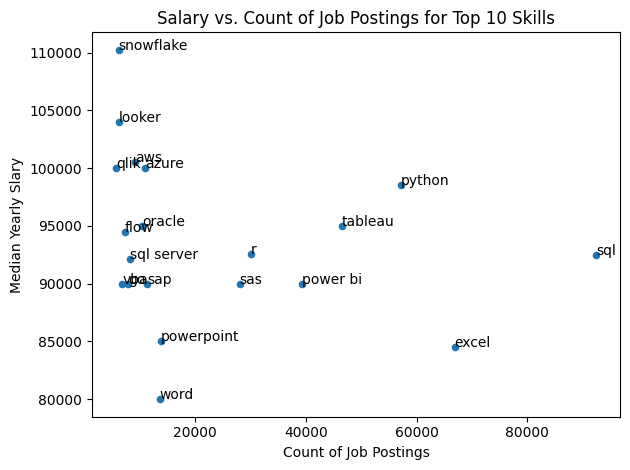

In [22]:
skills_stats.plot(kind ="scatter" ,x ="skill_count",y= "median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Slary")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
for i,text in enumerate(skills_stats.index):
   
    plt.text(skills_stats["skill_count"].iloc[i],skills_stats["median_salary"].iloc[i],text)
plt.show()

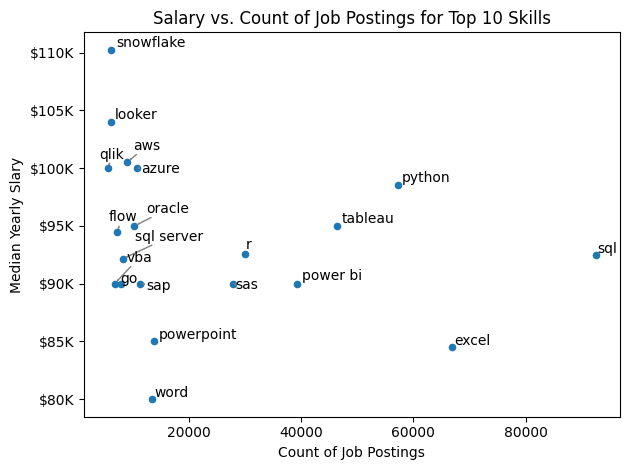

In [31]:
from adjustText import adjust_text



skills_stats.plot(kind ="scatter" ,x ="skill_count",y= "median_salary")

texts =[]
for i,text in enumerate(skills_stats.index):
   
    texts.append(plt.text(skills_stats["skill_count"].iloc[i],skills_stats["median_salary"].iloc[i],text))

adjust_text(texts,arrowprops =dict(arrowstyle = "->",color ="gray",lw= 1))   

ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))


plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Slary")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()